In [42]:
# Re-importing necessary libraries and redefining the required objects since the code execution state was reset
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Since the state was reset, we need to reload the data and preprocess it again
file_path = 'Weather Training Data.csv'
weather_data = pd.read_csv(file_path)
print(weather_data.columns)
# Assuming your DataFrame is named 'weather_data'
weather_data = weather_data.drop(columns=['row ID'])


# Handling missing values
numeric_columns = weather_data.select_dtypes(include=[np.number]).columns
imputer_numeric = SimpleImputer(strategy='mean')
weather_data[numeric_columns] = imputer_numeric.fit_transform(weather_data[numeric_columns])

categorical_columns = weather_data.select_dtypes(include=['object']).columns
imputer_categorical = SimpleImputer(strategy='most_frequent')
weather_data[categorical_columns] = imputer_categorical.fit_transform(weather_data[categorical_columns])

# Encoding categorical variables
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    weather_data[column] = label_encoders[column].fit_transform(weather_data[column])

# Normalizing the data
scaler = StandardScaler()
weather_data[numeric_columns] = scaler.fit_transform(weather_data[numeric_columns])

# Splitting the dataset into features and target variable
X = weather_data.drop(columns=['RainTomorrow'])
y = weather_data['RainTomorrow'].astype('int')

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying PCA
pca = PCA(n_components=17)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Number of components chosen by PCA
n_components = pca.n_components_

# Retrain logistic regression on the transformed dataset
logreg_pca = LogisticRegression(solver='liblinear', random_state=42)
logreg_pca.fit(X_train_pca, y_train)

# Predict on the transformed test set
y_pred_pca = logreg_pca.predict(X_test_pca)

# Evaluate the model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
classification_rep_pca = classification_report(y_test, y_pred_pca)

# n_components, accuracy_pca, classification_rep_pca

print(classification_rep_pca)

Index(['row ID', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     23081
           1       0.72      0.48      0.58      6774

    accuracy                           0.84     29855
   macro avg       0.79      0.71      0.74     29855
weighted avg       0.83      0.84      0.83     29855



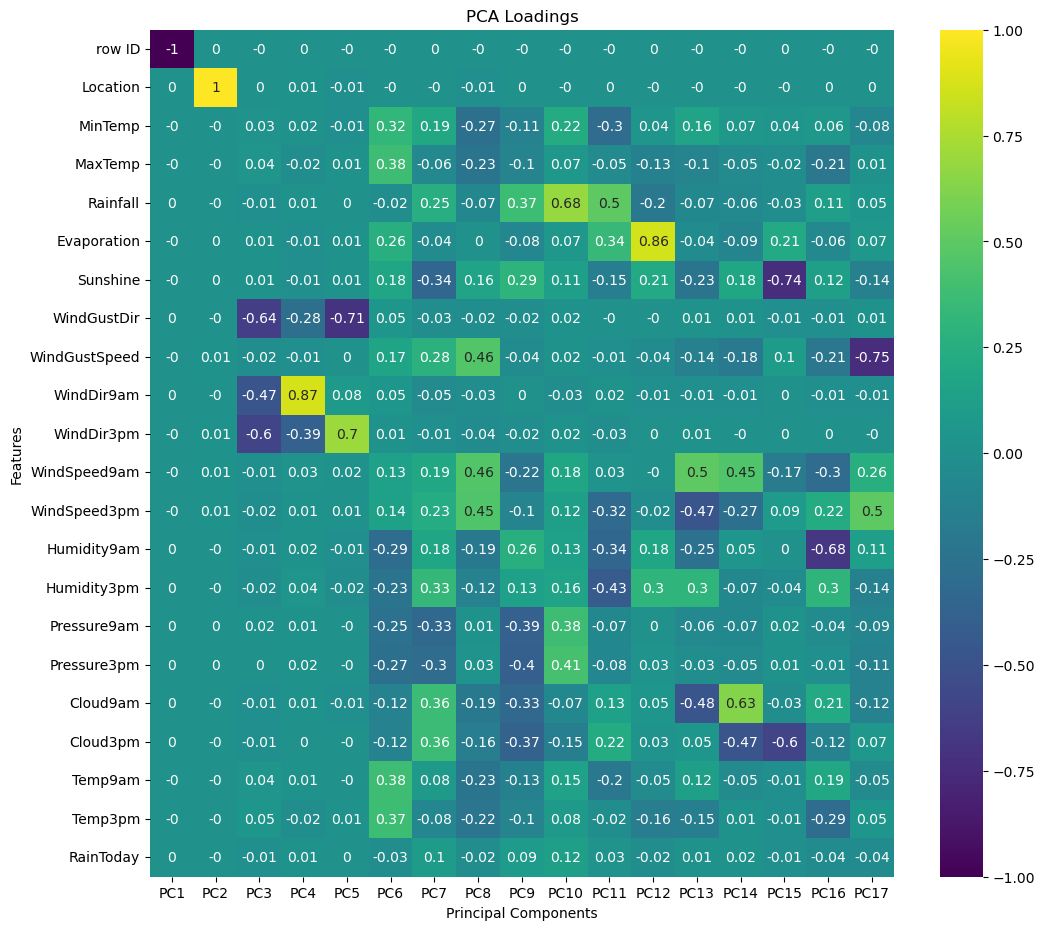

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'pca' is your fitted PCA object and 'X' is your original data
loadings = pca.components_
num_pc = pca.n_components_
pc_labels = ['PC'+str(i) for i in range(1, num_pc + 1)]
feature_labels = X.columns

# Create a DataFrame of loadings
df_loadings = pd.DataFrame(loadings.T, columns=pc_labels, index=feature_labels).round(2)

# Plotting the heatmap of loadings
plt.figure(figsize=(12, len(feature_labels)/2))
sns.heatmap(df_loadings, annot=True, cmap='viridis')
plt.title('PCA Loadings')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()


In [38]:
import pandas as pd
import numpy as np

# Assuming 'pca' is your fitted PCA object and 'X' is your original data
loadings = pca.components_
num_pc = pca.n_components_
feature_labels = X.columns

# Create a DataFrame of loadings
df_loadings = pd.DataFrame(loadings, columns=feature_labels)

# Identifying dominant features for each principal component
dominant_features = {}
for i in range(num_pc):
    pc = 'PC' + str(i + 1)
    # Sort the loadings by absolute value and get the feature with highest loading
    dominant_feature = df_loadings.iloc[i].abs().idxmax()
    dominant_features[pc] = dominant_feature

dominant_features


{'PC1': 'row ID',
 'PC2': 'Location',
 'PC3': 'WindGustDir',
 'PC4': 'WindDir9am',
 'PC5': 'WindGustDir',
 'PC6': 'MaxTemp',
 'PC7': 'Cloud3pm',
 'PC8': 'WindSpeed9am',
 'PC9': 'Pressure3pm',
 'PC10': 'Rainfall',
 'PC11': 'Rainfall',
 'PC12': 'Evaporation',
 'PC13': 'WindSpeed9am',
 'PC14': 'Cloud9am',
 'PC15': 'Sunshine',
 'PC16': 'Humidity9am',
 'PC17': 'WindGustSpeed'}